In [36]:
import numpy as np
import math
import xarray as xr
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import argparse
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import (
    LinearSegmentedColormap,
    BoundaryNorm,
    ListedColormap,
    LogNorm,
)
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature


In [37]:
# ## Feeding

# parser = argparse.ArgumentParser()

# parser.add_argument(
#     "-v",
#     "--variable",
#     help="the current variable implemented are ['temp_val', 'rain_rate_max', 'slp', 'wind_speed', 'rel_hum']",
# )
# parser.add_argument("-d", "--date", help="Use bash command 'date +%Y%m%d_%H%M' ")
# parser.add_argument(
#     "-i", "--input", required=False, help="the data-input folder", default="data/"
# )
# parser.add_argument(
#     "-o", "--output", required=False, help="the output folder", default="maps/"
# )
# # parser.print_help()
# args = parser.parse_args()


# exit()
# print(args.input, args.output)
# Defining variables
variabili = ["temp_val", "rain_rate_max", "slp", "wind_speed", "rel_hum"]
variable = "temp_val"
date='20230518_1820'
# if args.variable not in variabili:
#     print(f"{args.variable} is not present in the variable list")
#     exit()



In [38]:
# gf = gpd.read_file('data/geo-data/coordinate_stazione.csv'gdf.to_crs(3857))


In [39]:

# f['lat'] = gf[['lat_32']].to_crs()

In [40]:

## Defining functions
def compute_distance_weight(coord_stations, coord_grid):
    dist = (
        abs(scipy.spatial.distance.cdist(coord_stations, coord_grid).T[0]) / 10000
    )  # pick the appropriate distance metric
    dist_w = np.exp(-dist)
    print(dist_w)
    return dist_w


def compute_elevation_weight(z_stations, z_grid):
    if np.isnan(z_grid) == False:
        disl = abs(z_stations - z_grid) / 500  # pick the appropriate distance metric
        dist_z = np.exp(-disl[0])
    else:
        dist_z = 1
    return dist_z


def compute_weighted_var(d_w, z_w, T):
    weights = d_w * z_w * T
    # for i in range(len(T)):
    #     T_weighted = d_w[i]*z_w[i]*T[i]
    weighted_var = np.nansum(weights) / (np.nansum(d_w * z_w))
    # print(T_weighted.sum(),np.sum(d_w.T*z_w),T_mean)
    return weighted_var


In [41]:


##########
# Reading input
try:
    gf = pd.read_csv(f"data/geo-data/coordinate_stazione.csv")
except:
    print("Something went wrong, can't find coordinates file")
    exit()
try:
    dem = xr.open_dataset(f"data/geo-data/dem500.nc")
except:
    print("Something went wrong, can't find dem file")
    exit()
try:
    df = pd.read_csv(f"data/dati_20230518_1820.csv", na_values="NA")
except:
    print("Something went wrong, can't find data file")
    exit()

# gf=pd.read_csv('/home/drugo/Projects/rem/coordinate_stazione.csv')
# dem = xr.open_dataset('/home/drugo/Projects/rem/dem100.nc')
# df = pd.read_csv('/home/drugo/Projects/rem/dati_20230518_1820_temporale.csv',na_values='NA')

In [42]:
# gf['latitude']=gf.lat_32.se

In [43]:
grid_lon.shape

(118,)

In [44]:
station_coord = np.dstack([lon[:], lat[:], elev[:]])[0]

In [45]:
df#[df['stazione']=='Reggio Emilia']

datetime  id  id_rem           stazione        lon        lat  \
0   2023-05-18 18:10   1  RE1347      Cerreto Laghi  10.242900  44.296700   
1   2023-05-18 18:10   4  RE0767  Carnola - C.Monti  10.401000  44.415300   
2   2023-05-18 18:10   7  RE0665             Felina  10.458500  44.452200   
3   2023-05-18 18:10   8  RE0518        S. Giovanni  10.561100  44.526900   
4   2023-05-18 18:10   9  RE0281      Colli Borzano  10.622200  44.594900   
5   2023-05-18 18:10  10  RE0081             Arceto  10.719800  44.619700   
6   2023-05-18 18:10  11  RE0051      Reggio Emilia  10.621900  44.709800   
7   2023-05-18 18:10  12  RE0198   Quattro Castella  10.445600  44.630700   
8   2023-05-18 18:10  13  RE0637         Camporella  10.234500  44.421400   
9   2023-05-18 18:10  14  RE0030          Novellara  10.723200  44.843000   
10   2023-05-18 18:9  16  RE0842              Toano  10.571100  44.375200   
11  2023-05-18 18:10  17  RE0022            Boretto  10.543470  44.905990   
12  2023-05-18 18:10  18  RE0682             Casina  10.493100  44.525000   
13  2023-05-18 18:10  19  RE1330     Ventasso Laghi  10.275100  44.385700   
14  2023-05-18 18:11  20  RE0039            Gazzata  10.779300  44.702400   
15  2023-05-18 18:10  21  RE0032   Bagnolo in Piano  10.669410  44.762640   
16  2023-05-18 18:10  23  RE0088           Cavriago  10.513506  44.695149   
17  2023-05-18 18:10  28  RE0678      Villa Minozzo  10.459920  44.365190   
18  2023-05-18 18:10  15  RE1152             Febbio  10.428000  44.297000   
19  2023-05-18 18:14  27  RE1010    Oss. Cervarezza  10.327100  44.401700   
20  2023-05-18 18:16   6  RE2057        Monte Cusna  10.401600  44.282100   
21  2023-05-18 18:18  31  RE0438  Canossa e Rossena  10.326670  44.438610   
22  2023-05-18 18:18  30  RE0965             Civago  10.475200  44.251600   

    quota  riscaldatore  alt_anemometro  alt_sensori  ...  wind_dir  rel_hum  \
0    1347             1              10            3  ...       NaN     99.0   
1     767             0              10            3  ...     116.0     84.0   
2     665             0              10           10  ...     165.0     80.0   
3     518             0               8            2  ...     213.0      NaN   
4     281             0               8            2  ...     150.0     71.0   
5      81             0              10           10  ...     154.0     68.0   
6      51             0              10           10  ...      59.0     61.0   
7     198             0              10            2  ...      53.0     60.0   
8     637             0              10            2  ...      17.0     81.0   
9      30             0              10            9  ...      55.0     53.0   
10    842             1              10            2  ...      42.0     85.0   
11     22             0              12            3  ...     120.0      NaN   
12    682             0               3            2  ...     142.0     83.0   
13   1330             1               4            3  ...      28.0     94.0   
14     39             0              10            2  ...      80.0     68.0   
15     32             0              10           10  ...     136.0     64.0   
16     88             0              10           10  ...     130.0     62.0   
17    678             0               4            3  ...      70.0     79.0   
18   1152             1               4            3  ...      97.0     89.0   
19   1010             1               4            3  ...      87.0     88.0   
20   2057             0               7            6  ...       0.0     98.0   
21    438             0               2            2  ...      75.0     73.0   
22    965             1               5            5  ...      86.0     91.0   

    dewpoint  temp_wet_bulb  pm2_5  pm10  air_index  snow_height  radar  \
0        7.2            NaN    NaN   NaN        NaN          NaN    NaN   
1        9.4            NaN    NaN   NaN        NaN          NaN    NaN   
2        9.4     

In [67]:
## Extract coordinates and variables
ids = np.array([df.id[:]])
lon = np.array([gf.lon_32[:]])
lat = np.array([gf.lat_32[:]])
elev = np.array([df.quota[:]])
grid_lat = dem.y.values
grid_lon = dem.x.values
if variable == "temp_val":
    var2int = np.array([df[variable][:]])[0] + 273
else:
    var2int = np.array([df[variable][:]])[0]

# coordinates station
station_coord = np.dstack([lon[:], lat[:]])[0]
# print(station_coord.shape)
# station_coord[:3, :]
interp_var = np.full([dem.Band1.values.shape[0], dem.Band1.values.shape[1]], np.nan)

# Interpolation
for i in range(dem.Band1.values.shape[0]):
    for j in range(dem.Band1.values.shape[1]):
        if np.isnan(dem.Band1.values[i][j]) == False:
            d_w = compute_distance_weight(
                station_coord, np.array([[grid_lon[j], grid_lat[i]]])
            )
            if variable == "temp_val":
                z_w = compute_elevation_weight(elev, dem.Band1.values[i][j])
                print(z_w)
            else:
                z_w = 1
            interp_var[i, j] = compute_weighted_var(d_w, z_w, var2int)
        else:
            interp_var[i, j] = np.nan

[1.87864676e-01 1.24018477e-01 8.24654033e-02 3.09237712e-02
 1.29141608e-02 7.28739139e-03 3.84425587e-03 1.14517377e-02
 7.07915492e-02 7.36030931e-04 1.37787879e-01 5.10318302e-04
 3.57172465e-02 1.17975157e-01 2.59438363e-03 1.96435422e-03
 5.37156640e-03 2.14977255e-01 4.67345248e-01 1.23647237e-01
 5.29532154e-01 8.42524156e-02 6.40800660e-01]
[0.41095322 0.12882816 0.10505451 0.07829466 0.04873899 0.03267072
 0.03076813 0.04128418 0.09933315 0.02950263 0.14967696 0.02903434
 0.10868778 0.39721568 0.03003849 0.02962088 0.03313133 0.10782175
 0.27823871 0.20944882 0.5881789  0.06671831 0.19142181]
[1.79615234e-01 1.23167419e-01 8.27316610e-02 3.13537447e-02
 1.31281338e-02 7.45192085e-03 3.89297512e-03 1.14547586e-02
 6.86845409e-02 7.47181409e-04 1.41582386e-01 5.12812848e-04
 3.59434218e-02 1.14515160e-01 2.65271306e-03 1.99235026e-03
 5.39975568e-03 2.16306949e-01 4.65784306e-01 1.21108681e-01
 5.19059709e-01 8.27698282e-02 6.66381211e-01]
[0.4980773  0.15614035 0.12732658 0.09

In [68]:
elev

array([[1347,  767,  665,  518,  281,   81,   51,  198,  637,   30,  842,
          22,  682, 1330,   39,   32,   88,  678, 1152, 1010, 2057,  438,
         965]], dtype=int64)

In [47]:
# station_coord

In [48]:


# # Plotting stage
# if variable == "temp_val":
#     # levels = np.linspace(-20, 40, 31)
#     cmap_T = [        "#B400B4",        "#9600C8",        "#A064DC",        "#BE8CC8",        "#E1AFC3",        "#99DDB4",        "#26B6A2",        "#1EC5B6",        "#16D5CE",        "#0EE1E5",        "#05E5F6",        "#00DE89",        "#00C638",        "#04B400",        "#21C000",        "#42CC00",
#                       "#67D700",        "#8FE300",        "#BAEF00",        "#E9FA00",        "#FDF000",        "#F7D500",        "#F2BB00",        "#EDA100",        "#E88900",        "#E16600",        "#D93E00",        "#D21800",        "#C8000F",        "#B8003C",        "#A90062",        "#990080",
#     ]
#     levels = np.array(
#         [
#             -20,
#             -18,
#             -16,
#             -14,
#             -12,
#             -10,
#             -8,
#             -6,
#             -4,
#             -2,
#             0,
#             2,
#             4,
#             6,
#             8,
#             10,
#             12,
#             14,
#             16,
#             18,
#             20,
#             22,
#             24,
#             26,
#             28,
#             30,
#             32,
#             34,
#             36,
#             38,
#             40,
#         ]
#     )
#     palette = LinearSegmentedColormap.from_list("palette_temp", cmap_T, N=len(cmap_T))
#     norm = mpl.colors.BoundaryNorm(levels, palette.N, extend="both")
#     # palette="gist_ncar"
#     interp_var = interp_var - 273
# elif variable == "rain_rate_max":
#     cmap_prp = "BuPu"
#     # cmap_prp = ['#C0C0C0', '#D6E2FF', '#B5C9FF', '#8EB2FF', '#7F96FF', '#6370F7', '#009E1E' , '#3CBC3D','#B3D16E', '#B9F96E',
#     #'#FEFEA0', '#FFF914', '#FFA30A', '#E50000', '#BD0000', '#D464C3',]# '#B5199D', '#840094', '#B4B4B4', '#8C8C8C', '#5A5A5A', '#323232']
#     #    levels = np.array([0.2, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 125, 150, 175, 200, 250, 300])
#     # levels = np.array([0.2, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 125, 150, 175, 200, 250, 300])
#     levels = np.array(
#         [
#             1,
#             2,
#             3,
#             4,
#             5,
#             7.5,
#             10,
#             15,
#             20,
#         ]
#     )  #  30,  35, 40,  50,  75,  100]) #,  90, 100, 125, 150, 175, 200, 250, 300
#     # palette = LinearSegmentedColormap.from_list('palette_prp', cmap_prp, N=len(cmap_prp))
#     palette = cmap_prp
#     # norm =LogNorm(vmin=levels[0], vmax=levels[-1], clip=1) #= BoundaryNorm(levels, palette.N)
#     # orm = mpl.colors.BoundaryNorm(levels, palette.N, extend='both')
#     # norm = mpl.colors.BoundaryNorm(levels, palette.N, extend='both')

# #    levels = np.linspace(0, 20, 21)
# #    palette="Blues"
# elif variable == "rel_hum":
#     cmap_hr = [
#         "#C0C0C0",
#         "#C8000F",
#         "#E16600",
#         "#F2BB00",
#         "#E9FA00",
#         "#67D700",
#         "#04B400",
#         "#00F5E9",
#         "#16D5CE",
#         "#2CA890",
#         "#1D6DA5",
#         "#4C00B3",
#     ]
#     levels = np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#     palette = LinearSegmentedColormap.from_list("palette_hr", cmap_hr, N=len(cmap_hr))
#     norm = mpl.colors.BoundaryNorm(levels, palette.N, extend="both")

# #    levels = np.linspace(0, 100, 11)
# #    palette="Blues"
# elif variable == "rh_speed":
#     cmap_rh = [
#         "#C0C0C0",
#         "#EEFFFF",
#         "#96D2FA",
#         "#50A5F5",
#         "#196EE1",
#         "#00D278",
#         "#00A000",
#         "#E11400",
#         "#A50000",
#         "#FF00FF",
#         "#FFAAFF",
#         "#FF9600",
#         "#AAAAAA",
#         "#777777",
#     ]
#     # levels = np.array([0.5,2.5,5,11,19,30,39,50,61,74,87,102,117])
#     levels = np.array([2.5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
#     palette = LinearSegmentedColormap.from_list(
#         "palette_wind", cmap_wind, N=len(cmap_wind)
#     )
#     norm = mpl.colors.BoundaryNorm(levels, palette.N, extend="both")



In [49]:
# import matplotlib as mpl
mpl.rcParams.update({'font.size': 18})
# # hfont = {'fontname':'Calibri'}
# cmap = mpl.colors.LinearSegmentedColormap.from_list('custom blue', 
#                                              [(0.5, "#C0C0C0"),
#                                               (2, "#EEFFFF"),
#                                               (5, "#96D2FA"),
#                                               (11, "#50A5F5"),
#                                               (19, "#196EE1"),
#                                               (30, "#00D278"),
#                                               (39, "#00A000"),
#                                               (50, "#E11400"),
#                                               (61, "#A50000"),
#                                               (74, "#FF00FF"),
#                                               (87, "#FFAAFF"),
#                                               (102, "#FF9600"),
#                                               (117, "#AAAAAA"),], N=13)

# levels = np.array([0.5,1,1.5,2.5,5,11,19,30,39,50,61,74,87,])#102,117])
# # palette = 'rainbow'# mpl.colors.ListedColormap([ "#C0C0C0",        "#EEFFFF",        "#96D2FA",        "#50A5F5",        "#196EE1",        "#00D278",        "#00A000",        "#E11400",        "#A50000",        "#FF00FF",        "#FFAAFF",        "#FF9600",        "#AAAAAA",        "#777777",])
# norm = mpl.colors.BoundaryNorm(levels, cmap.N,)# extend="both")
# # norm = mpl.colors.LogNorm()

In [50]:
# color_temp=["#6B0078", "#7B006B", "#8F005B", "#A3004A", "#B3003E", "#C7002D", "#DB001D", "#EB0010", "#FF0F00", "#FF2300", 
#             "#FF3700", "#FF4600", "#FF5A00", "#FF6E00", "#FF7D00", "#FF9100", "#FFA500", "#FFAD00", "#FFB800", "#FFC300", 
#             "#FFCB00", "#FFD600", "#FFE100", "#FFE900", "#FFF400", "#FFFF00", "#E9F801", "#CCEF03", "#AFE605", "#99E006", 
#             "#7CD708", "#66D009", "#49C70B", "#2CBE0D", "#08B81E", "#07C13B", "#06C850", "#05D16E", "#04DA8B", "#03E1A0", 
#             "#02EABE", "#01F3DB", "#00FAF0", "#00F0FF", "#00D1FF", "#00B9FF", "#009BFF", "#007CFF", "#0064FF", "#0046FF", 
#             "#0027FF", "#000FFF", "#2100FA", "#2E00E8", "#4200D1", "#4C00BF", "#5400A8", "#570096", "#560088", "#53006D", "#4D005B"]
# print(color_temp)
# color_temp.reverse()
# print(color_temp)
# valori = [40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20]
# valori.reverse()
# print(valori)

In [34]:
# levels_temp = np.array([-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16,            18,            20,            22,            24,            26,            28,            30,            32,            34,            36,            38,            40,        ])
levels_temp = np.array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
levels_temp_norm = (levels_temp-levels_temp[0])/(levels_temp[-1]-levels_temp[0])

print(levels_temp_norm)

# color_temp= [ "#B400B4",        "#9600C8",        "#A064DC",        "#BE8CC8",        "#E1AFC3",        "#99DDB4",        "#26B6A2",        "#1EC5B6",        "#16D5CE",        "#0EE1E5",        "#05E5F6",        "#00DE89",        "#00C638",        "#04B400",        "#21C000",        "#42CC00",
#                       "#67D700",        "#8FE300",        "#BAEF00",        "#E9FA00",        "#FDF000",        "#F7D500",        "#F2BB00",        "#EDA100",        "#E88900",        "#E16600",        "#D93E00",        "#D21800",        "#C8000F",        "#B8003C",        "#A90062",        "#990080",
#     ]

color_temp=['#4D005B', '#53006D', '#560088', '#570096', '#5400A8', '#4C00BF', '#4200D1', '#2E00E8', '#2100FA', '#000FFF', 
            '#0027FF', '#0046FF', '#0064FF', '#007CFF', '#009BFF', '#00B9FF', '#00D1FF', '#00F0FF', '#00FAF0', '#01F3DB',
            '#02EABE', '#03E1A0', '#04DA8B', '#05D16E', '#06C850', '#07C13B', '#08B81E', '#2CBE0D', '#49C70B', '#66D009', 
            '#7CD708', '#99E006', '#AFE605', '#CCEF03', '#E9F801', '#FFFF00', '#FFF400', '#FFE900', '#FFE100', '#FFD600', 
            '#FFCB00', '#FFC300', '#FFB800', '#FFAD00', '#FFA500', '#FF9100', '#FF7D00', '#FF6E00', '#FF5A00', '#FF4600', 
            '#FF3700', '#FF2300', '#FF0F00', '#EB0010', '#DB001D', '#C7002D', '#B3003E', '#A3004A', '#8F005B', '#7B006B', '#6B0078']


cmap_temp = mpl.colors.LinearSegmentedColormap.from_list('temp',list(zip(levels_temp_norm,color_temp)))
norm_temp= mpl.colors.BoundaryNorm(levels_temp, cmap_temp.N)
cmap_temp
interp_var = interp_var - 273


[0.         0.01666667 0.03333333 0.05       0.06666667 0.08333333
 0.1        0.11666667 0.13333333 0.15       0.16666667 0.18333333
 0.2        0.21666667 0.23333333 0.25       0.26666667 0.28333333
 0.3        0.31666667 0.33333333 0.35       0.36666667 0.38333333
 0.4        0.41666667 0.43333333 0.45       0.46666667 0.48333333
 0.5        0.51666667 0.53333333 0.55       0.56666667 0.58333333
 0.6        0.61666667 0.63333333 0.65       0.66666667 0.68333333
 0.7        0.71666667 0.73333333 0.75       0.76666667 0.78333333
 0.8        0.81666667 0.83333333 0.85       0.86666667 0.88333333
 0.9        0.91666667 0.93333333 0.95       0.96666667 0.98333333
 1.        ]


In [51]:
# levels_temp = np.array([-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16,            18,            20,            22,            24,            26,            28,            30,            32,            34,            36,            38,            40,        ])
levels_temp = np.array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
levels_temp_norm = (levels_temp-levels_temp[0])/(levels_temp[-1]-levels_temp[0])

print(levels_temp_norm)

# color_temp= [ "#B400B4",        "#9600C8",        "#A064DC",        "#BE8CC8",        "#E1AFC3",        "#99DDB4",        "#26B6A2",        "#1EC5B6",        "#16D5CE",        "#0EE1E5",        "#05E5F6",        "#00DE89",        "#00C638",        "#04B400",        "#21C000",        "#42CC00",
#                       "#67D700",        "#8FE300",        "#BAEF00",        "#E9FA00",        "#FDF000",        "#F7D500",        "#F2BB00",        "#EDA100",        "#E88900",        "#E16600",        "#D93E00",        "#D21800",        "#C8000F",        "#B8003C",        "#A90062",        "#990080",
#     ]

color_temp=['#4D005B', '#53006D', '#560088', '#570096', '#5400A8', '#4C00BF', '#4200D1', '#2E00E8', '#2100FA', '#000FFF', 
            '#0027FF', '#0046FF', '#0064FF', '#007CFF', '#009BFF', '#00B9FF', '#00D1FF', '#00F0FF', '#00FAF0', '#01F3DB',
            '#02EABE', '#03E1A0', '#04DA8B', '#05D16E', '#06C850', '#07C13B', '#08B81E', '#2CBE0D', '#49C70B', '#66D009', 
            '#7CD708', '#99E006', '#AFE605', '#CCEF03', '#E9F801', '#FFFF00', '#FFF400', '#FFE900', '#FFE100', '#FFD600', 
            '#FFCB00', '#FFC300', '#FFB800', '#FFAD00', '#FFA500', '#FF9100', '#FF7D00', '#FF6E00', '#FF5A00', '#FF4600', 
            '#FF3700', '#FF2300', '#FF0F00', '#EB0010', '#DB001D', '#C7002D', '#B3003E', '#A3004A', '#8F005B', '#7B006B', '#6B0078']


cmap_temp = mpl.colors.LinearSegmentedColormap.from_list('temp',list(zip(levels_temp_norm,color_temp)),N=len(levels_temp))
norm_temp= mpl.colors.BoundaryNorm(levels_temp, cmap_temp.N)
cmap_temp
interp_var = interp_var - 273


[0.         0.01666667 0.03333333 0.05       0.06666667 0.08333333
 0.1        0.11666667 0.13333333 0.15       0.16666667 0.18333333
 0.2        0.21666667 0.23333333 0.25       0.26666667 0.28333333
 0.3        0.31666667 0.33333333 0.35       0.36666667 0.38333333
 0.4        0.41666667 0.43333333 0.45       0.46666667 0.48333333
 0.5        0.51666667 0.53333333 0.55       0.56666667 0.58333333
 0.6        0.61666667 0.63333333 0.65       0.66666667 0.68333333
 0.7        0.71666667 0.73333333 0.75       0.76666667 0.78333333
 0.8        0.81666667 0.83333333 0.85       0.86666667 0.88333333
 0.9        0.91666667 0.93333333 0.95       0.96666667 0.98333333
 1.        ]


In [52]:
# color_temp=['#4D005B', '#53006D', '#560088', '#570096', '#5400A8', '#4C00BF', '#4200D1', '#2E00E8', '#2100FA', '#000FFF', 
#             '#0027FF', '#0046FF', '#0064FF', '#007CFF', '#009BFF', '#00B9FF', '#00D1FF', '#00F0FF', '#00FAF0', '#01F3DB',
#             '#02EABE', '#03E1A0', '#04DA8B', '#05D16E', '#06C850', '#07C13B', '#08B81E', '#2CBE0D', '#49C70B', '#66D009', 
#             '#7CD708', '#99E006', '#AFE605', '#CCEF03', '#E9F801', '#FFFF00', '#FFF400', '#FFE900', '#FFE100', '#FFD600', 
#             '#FFCB00', '#FFC300', '#FFB800', '#FFAD00', '#FFA500', '#FF9100', '#FF7D00', '#FF6E00', '#FF5A00', '#FF4600', 
#             '#FF3700', '#FF2300', '#FF0F00', '#EB0010', '#DB001D', '#C7002D', '#B3003E', '#A3004A', '#8F005B', '#7B006B', '#6B0078']
# cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

[0.         0.006004   0.00933956 0.01601067 0.02268179 0.03268846
 0.04936624 0.06604403 0.0993996  0.13275517 0.16611074 0.19946631
 0.23282188 0.26617745 0.33288859 0.41627752 0.49966644 0.58305537
 0.6664443  0.83322215 1.        ]


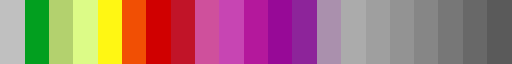

In [53]:
levels_prp = np.array([0.2, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 125, 150, 175, 200, 250, 300])
levels_prp_norm = (levels_prp-levels_prp[0])/(levels_prp[-1]-levels_prp[0])

print(levels_prp_norm)

color_prp= ['#C0C0C0', '#D6E2FF', '#B5C9FF', '#8EB2FF', '#7F96FF', '#6370F7', '#009E1E' , '#3CBC3D','#B3D16E', '#B9F96E', '#FEFEA0', '#FFF914', '#FFA30A', '#E50000', '#BD0000', '#D464C3', '#B5199D', '#840094', '#B4B4B4', '#8C8C8C', '#5A5A5A']

cmap_prp = mpl.colors.LinearSegmentedColormap.from_list('prp',list(zip(levels_prp_norm,color_prp)),N=len(levels_prp))
norm_prp= mpl.colors.BoundaryNorm(levels_prp, cmap_prp.N,)
cmap_prp

In [54]:
levels_wind = np.array([0.5,2.5,5,11,19,30,39,50,61,74,87,102,117])
levels_wind_norm = (levels_wind-levels_wind[0])/(levels_wind[-1]-levels_wind[0])

print(levels_wind_norm)

color_wind= ù[ "#C0C0C0",        "#EEFFFF",        "#96D2FA",        "#50A5F5",        "#196EE1",        "#00D278",        "#00A000",        "#E11400",        "#A50000",        "#FF00FF",        "#FFAAFF",        "#FF9600",        "#AAAAAA"]

cmap_wind = mpl.colors.LinearSegmentedColormap.from_list('wind',list(zip(levels_wind_norm,color_wind)),N=len(levels_wind))
norm_wind= mpl.colors.BoundaryNorm(levels_wind, cmap_wind.N,)
cmap_wind

[0.         0.01716738 0.03862661 0.09012876 0.15879828 0.25321888
 0.3304721  0.4248927  0.5193133  0.63090129 0.74248927 0.87124464
 1.        ]


type: name 'ù' is not defined

[0.         0.09090909 0.19191919 0.29292929 0.39393939 0.49494949
 0.5959596  0.6969697  0.7979798  0.8989899  1.        ]


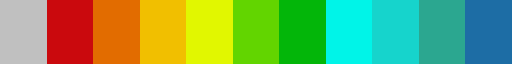

In [55]:
levels_rh = np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
levels_rh_norm = (levels_rh-levels_rh[0])/(levels_rh[-1]-levels_rh[0])

print(levels_rh_norm)

color_rh= ["#C0C0C0",        "#C8000F",        "#E16600",        "#F2BB00",        "#E9FA00",        "#67D700",        "#04B400",        "#00F5E9",        "#16D5CE",        "#2CA890",        "#1D6DA5",        "#4C00B3",]
cmap_rh = mpl.colors.LinearSegmentedColormap.from_list('rh',list(zip(levels_rh_norm,color_rh)),N=len(levels_rh))
norm_rh= mpl.colors.BoundaryNorm(levels_rh, cmap_rh.N,)
cmap_rh

In [56]:
# from matplotlib import cm
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.linalg import norm
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# import numpy as np
# import math
# import mpl_toolkits.mplot3d.art3d as art3d
# import matplotlib.colors as clr

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# origin = [0,0,0]
# #radius = R
# p0 = np.array(origin)
# p1 = np.array([8, 8, 8])
# origin = np.array(origin)
# R = 1
# #vector in direction of axis
# v = p1 - p0
# #find magnitude of vector
# mag = norm(v)
# #unit vector in direction of axis
# v = v / mag
# #make some vector not in the same direction as v
# not_v = np.array([1, 0, 0])
# if (v == not_v).all():
#     not_v = np.array([0, 1, 0])
# #make vector perpendicular to v
# n1 = np.cross(v, not_v)
# #normalize n1
# n1 /= norm(n1)
# #make unit vector perpendicular to v and n1
# # 
# n2 = np.cross(v, n1)
# #surface ranges over t from 0 to length of axis and 0 to 2*pi
# t = np.linspace(0, mag, 600)
# theta = np.linspace(0, 2 * np.pi, 100)
# #use meshgrid to make 2d arrays
# t, theta = np.meshgrid(t, theta)
# #generate coordinates for surface
# X, Y, Z = [p0[i] + v[i] * t + R * np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
# #THIS IS WHERE THE COLOR MAP I
# cmap = clr.LinearSegmentedColormap.from_list('custom blue', 
#                                              [((0), "#C0C0C0"),
#                                               ((0.01), "#EEFFFF"),
#                                               ((0.02), "#96D2FA"),
#                                               ((0.03), "#50A5F5"),
#                                               ((0.29), "#196EE1"),
#                                               ((0.30), "#00D278"),
#                                               ((0.39), "#00A000"),
#                                               ((0.50), "#E11400"),
#                                               ((0.61), "#A50000"),
#                                               ((0.74), "#FF00FF"),
#                                               ((0.87), "#FFAAFF"),
#                                               ((0.92), "#FF9600"),
#                                               ((1), "#AAAAAA")], N=13)

# # cmap = clr.LinearSegmentedColormap.from_list('custom blue',['#ffff00','#002266'], N=256)
# col1 = cmap(np.linspace(0,1,600)) # linear gradient along the t-axis
# col1 = np.repeat(col1[np.newaxis,:, :], 100, axis=0) # expand over the theta-axis
# ax.plot_surface(X, Y,Z, facecolors = col1, shade = True, alpha = 0.9, linewidth = 0)
# ax.view_init(15,-40)
# plt.show()

In [57]:
# col1

In [58]:
# 0.5/117

In [59]:
all_values=gf[["stazione", "lon_32", "lat_32","riscaldatore"]] #.loc[(gf["stazione"] == "Novellara")].values[0]
for i in range(len(all_values.riscaldatore)):
    print(all_values.riscaldatore[i])


7.1
12.3
13.1
13.8
16.5
18.4
19.6
17.9
13.4
20.5
11.6
19.9
12.3
7.7
19.3
19.6
19.1
12.7
9.4
9.7
1.9
15.4
10.1


In [60]:
all_values.riscaldatore[0]

7.1

In [61]:
for i in range(len(all_values)):
    plt.text(
        all_valueslon_32,
        all_values.lat_32,
        all_values.riscaldatore[i],
        horizontalalignment="right",
        transform=ccrs.epsg(32632),
    )


type: name 'all_valueslon_32' is not defined

['Novellara' 636185.0542156906 4966954.273692283]
<class 'numpy.ndarray'>


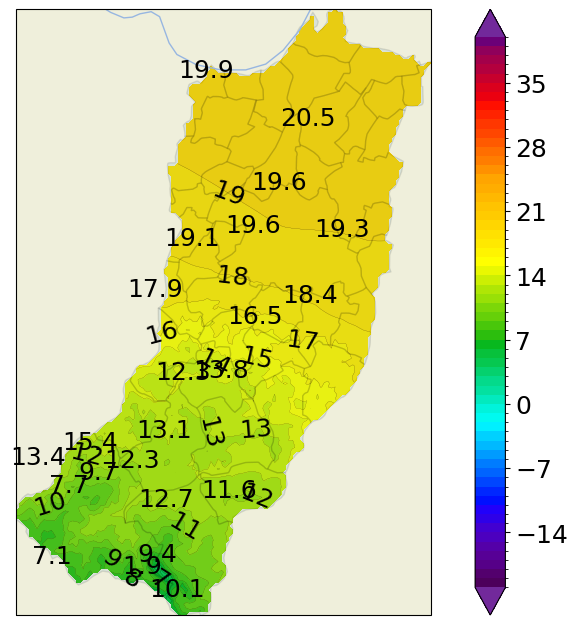

In [66]:

#    levels = np.linspace(0, 25, 26)
#    palette="BuPu"
# levels = np.linspace(-20, 40, 31)
Novellara = (
    gf[["stazione", "lon_32", "lat_32"]].loc[(gf["stazione"] == "Novellara")].values[0]
)
ReggioEmilia = (
    gf[["stazione", "lon_32", "lat_32"]].loc[(gf["stazione"] == "Reggio Emilia")].values[0]
)
CMonti = (
    gf[["stazione", "lon_32", "lat_32"]].loc[(gf["stazione"] == "Carnola - C.Monti")].values[0]
)
Casina = (
    gf[["stazione", "lon_32", "lat_32"]].loc[(gf["stazione"] == "Casina")].values[0]
)
fname = f"data/geo-data/comuni_reggio_Emilia.shp"
print(Novellara)


def main():
    fig = plt.figure(figsize=(dem.Band1.shape[0] / 75*5 , dem.Band1.shape[1] / 75*5 ))
    shape_feature = ShapelyFeature(
        Reader(fname).geometries(), ccrs.epsg(32632), edgecolor="k", alpha=0.1
    )

    # Setup a global EckertIII map with faint coastlines.
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.epsg(32632))
    ax.add_feature(shape_feature)

    # ax.set_extent([10, 11, 44.2,45], crs=ccrs.PlateCarree())
    # ax.coastlines('110m', alpha=0.1)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    #    # Add colourful filled contours.
    #    filled_c = ax.contourf(grid_lon, grid_lat, interp_var, levels=levels, cmap='Blues',vmin=levels[0], vmax=levels[-1],extend='both')

    print(type(interp_var))

    # And black line contours.
    line_c = ax.contour(
        grid_lon,
        grid_lat,
        (interp_var),
        levels=levels_temp,
        vmin=levels_temp[0],
        vmax=levels_temp[-1],  # filled_c.levels,
        colors=["black"],
        linewidths=0.1,
        extend="both",
    )
    # 
    # 
    
    # filled_c= ax.pcolormesh(grid_lon, grid_lat, interp_var, vmin=levels_temp[0],        vmax=levels_temp[-1], cmap=cmap_temp)

    # Add colourful filled contours.
    filled_c = ax.contourf(
        grid_lon,
        grid_lat,
        interp_var,
        cmap=cmap_temp,
        levels=levels_temp,
        norm=norm_temp,
        vmin=levels_temp[0],
        vmax=levels_temp[-1],
        extend="both",
    )
    filled_c.cmap.set_under("#72299B", alpha=1)
    filled_c.cmap.set_over("#72299B", alpha=1)

    # CS3.cmap.set_over('cyan')

    # Add a colorbar for the filled contour.
    fig.colorbar(filled_c, orientation="vertical", extend="both")#,spacing='uniform',ticks= levels)
    #    fig.colorbar(filled_c, cax=sub_ax1)
    # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=palette),
    #         orientation='vertical',)
    # label="Discrete intervals with extend='both' keyword")

    # ax.scatter(Novellara[1], Novellara[2], color="k", edgecolor="k")
    # ax.scatter(ReggioEmilia[1], ReggioEmilia[2], color="k", edgecolor="k")
    # ax.scatter(CMonti[1], CMonti[2], color="k", edgecolor="k")
    # ax.scatter(Casina[1], Casina[2], color="k", edgecolor="k")

    # for i in range(len(all_values)):

    # plt.text(
    #     Novellara[1] - 1000,
    #     Novellara[2] - 1000,
    #     Novellara[0],
    #     horizontalalignment="right",
    #     transform=ccrs.epsg(32632),
    # )

    # plt.text(
    #     ReggioEmilia[1],
    #     ReggioEmilia[2] + 750,
    #     ReggioEmilia[0],
    #     horizontalalignment="center",
    #     transform=ccrs.epsg(32632),
    # )
    # plt.text(
    #     CMonti[1],
    #     CMonti[2] + 500,
    #     CMonti[0][10:],
    #     horizontalalignment="left",
    #     transform=ccrs.epsg(32632),
    # )
    # plt.text(
    #     Casina[1],
    #     Casina[2] + 500,
    #     Casina[0],
    #     horizontalalignment="left",
    #     transform=ccrs.epsg(32632),
    # )

    #DATI STAZIONE

    for i in range(len(all_values)):
        plt.text(
            all_values.lon_32[i],
            all_values.lat_32[i],
            all_values.riscaldatore[i],
            horizontalalignment="right",
            transform=ccrs.epsg(32632),
            )

    # Use the line contours to place contour labels.
    ax.clabel(
        line_c,  # Typically best results when labelling line contours.
        colors=["black"],
        levels=line_c.levels,
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=" {:.0f} ".format,  # Labes as integers, with some extra space.
    )
    fig.savefig(
        f"maps/mappa_{variable}_{date}_60_no_line.png",
        bbox_inches="tight",
        transparent=False,
    )  # pad_inches=0.1,
    # facecolor='auto', edgecolor='auto',
    # backend=None,)

    # plt.show()

    # return filled_c.levels


if __name__ == "__main__":
    main()

In [ ]:
# interp_var.hist()

In [65]:
np.nanmax(interp_var)

3.424804027989602